<a href="https://colab.research.google.com/github/Dwagh14/Bike-Sharing-Demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
import scipy.stats as stat
from scipy import stats
import pylab

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Supervised ML Regression-Bike Sharing Demand Prediction/SeoulBikeData.csv", 
                 encoding = 'unicode_escape')

# **Data Understanding**

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
df.shape

(8760, 14)

# **Data Cleaning**

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    8760
dtype: int64

# Breaking down Date column into Three columns i.e. Day, Month and Year

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df.drop(['Date'], axis=1, inplace=True)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


# **Exploratory Data Analysis**

In [ ]:
all_seasons = df.groupby('Seasons').sum()
all_seasons

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
Seasons,,,,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,37248,18816,4407312
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,32808,10992,4455744
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,35400,15048,4455744
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,32256,12312,4358136


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8fe2c69d0>],
      dtype=object)

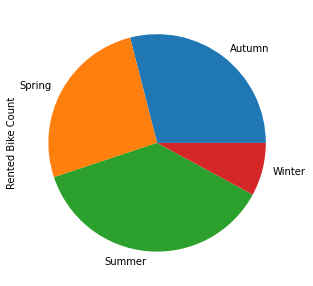

In [ ]:
all_seasons['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(5,5))

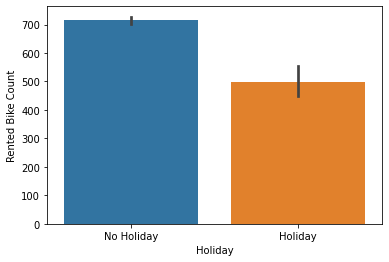

In [ ]:
sns.barplot(x=df['Holiday'], y=df['Rented Bike Count'], data=df)

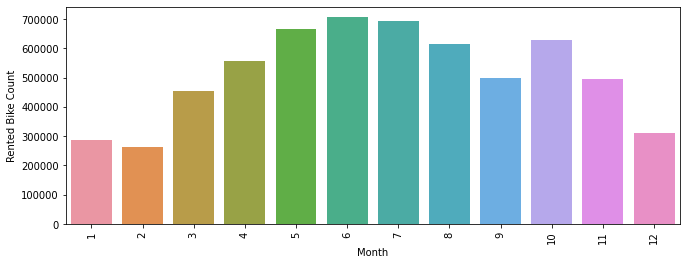

In [ ]:
month = df.groupby('Month').sum().reset_index()
plt.figure(figsize=(11,4))
sns.barplot(x='Month', y='Rented Bike Count', data=month)
plt.xticks(rotation=90);

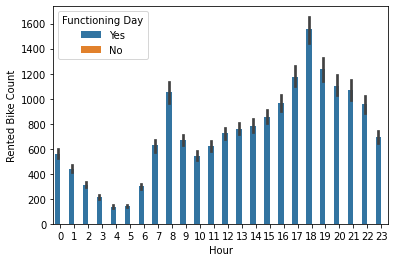

In [ ]:
sns.barplot(x=df['Hour'], y=df['Rented Bike Count'], hue=df['Functioning Day'], data=df);

In [ ]:
# Our dependent variable is "Rented Bike Count'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


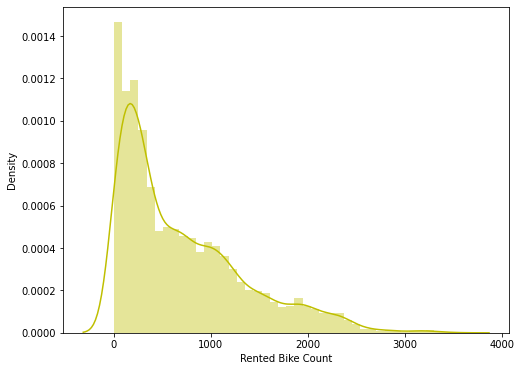

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['Rented Bike Count'], color = "y")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


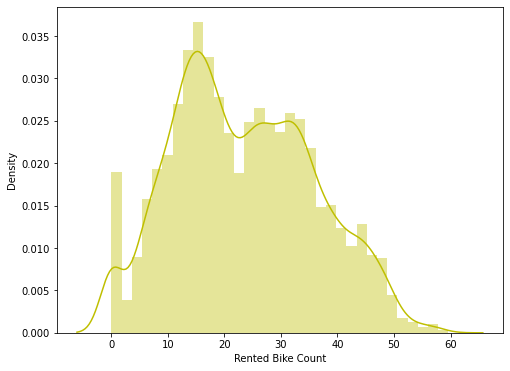

In [ ]:
plt.figure(figsize = (8,6))
sns.distplot(np.sqrt(df['Rented Bike Count']), color = 'y')


In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

# Checking the distribution of all independnt variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


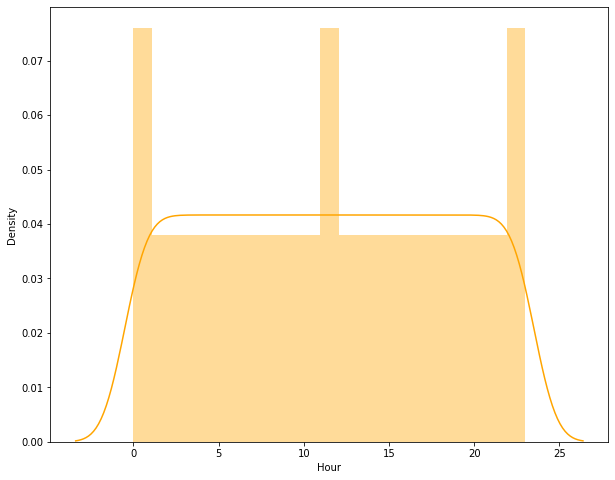

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


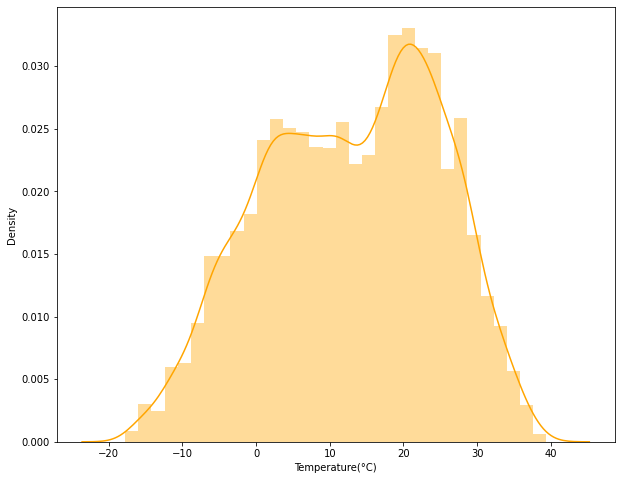

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


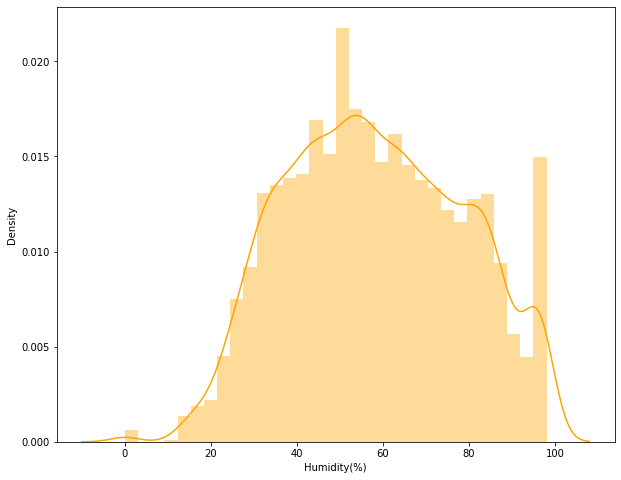

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


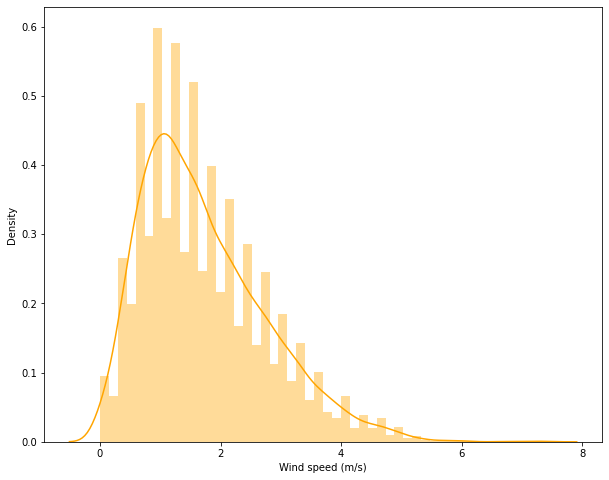

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


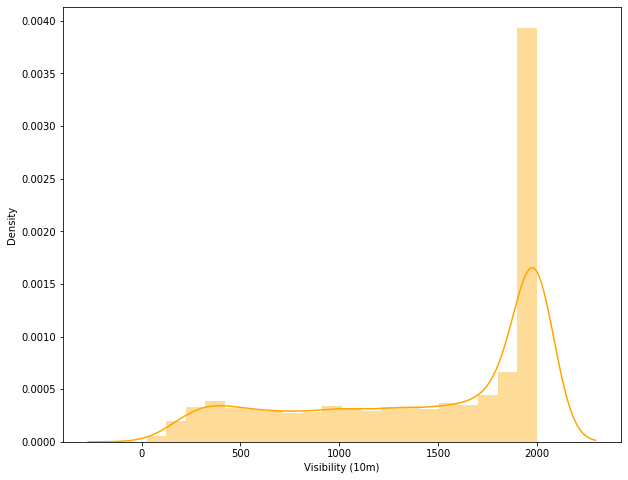

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


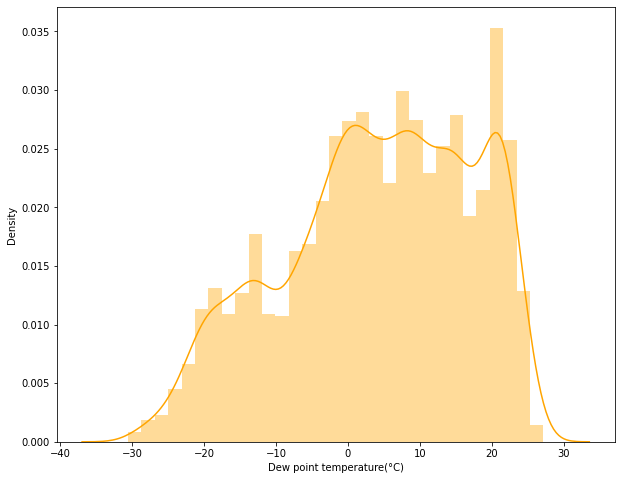

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


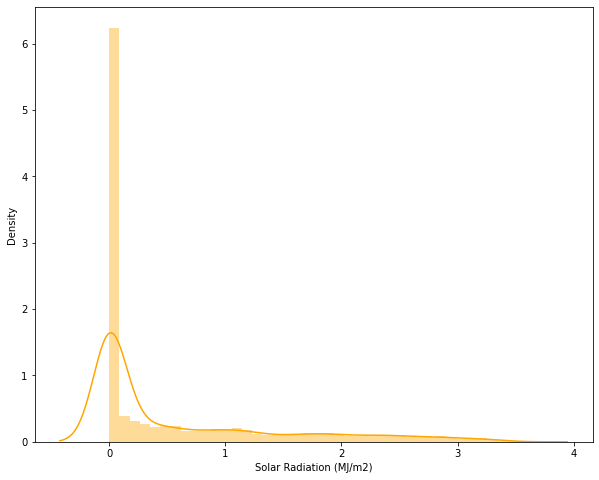

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


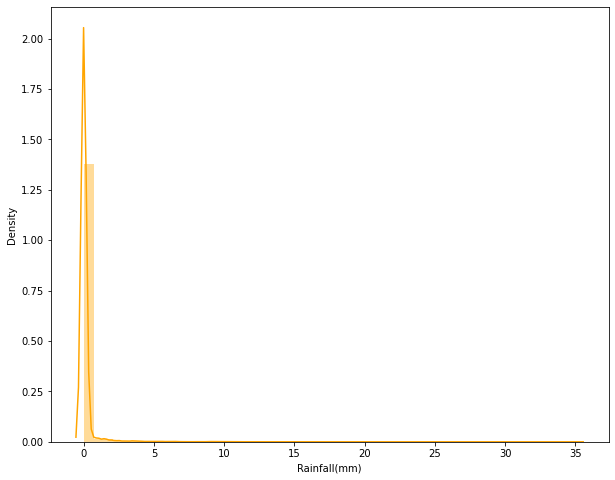

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


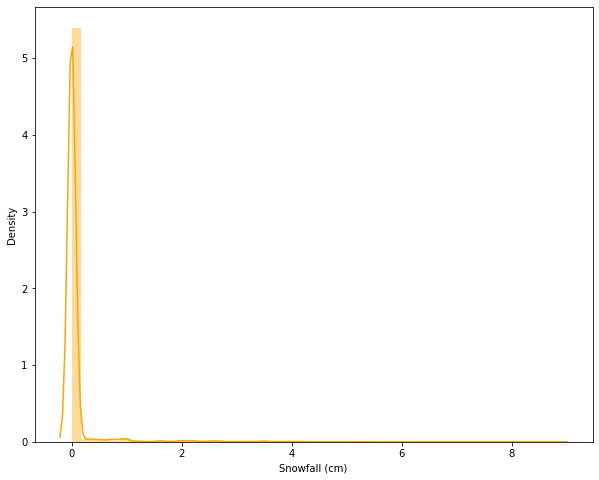

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


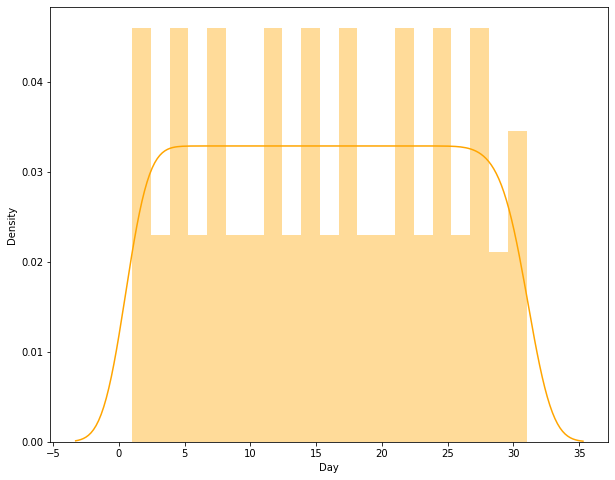

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


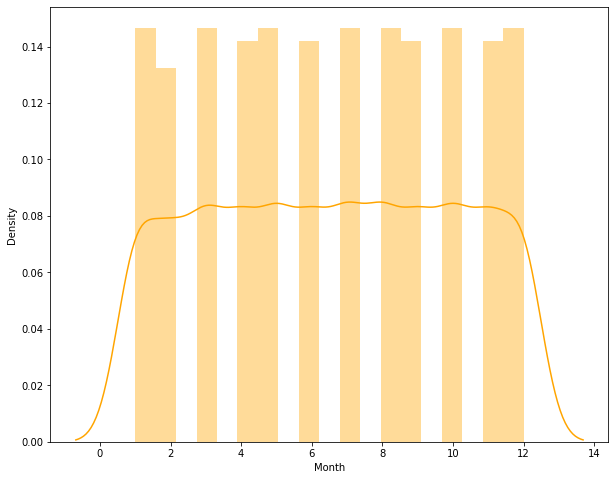

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


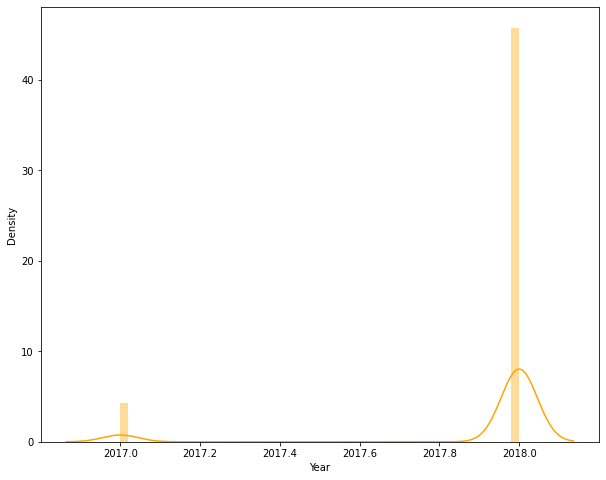

In [ ]:
for col in numeric_features[1:]:
  plt.figure(figsize = (10,8))
  sns.distplot(df[col], color = 'orange')
  plt.show()

# Transformation of all Independent Variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


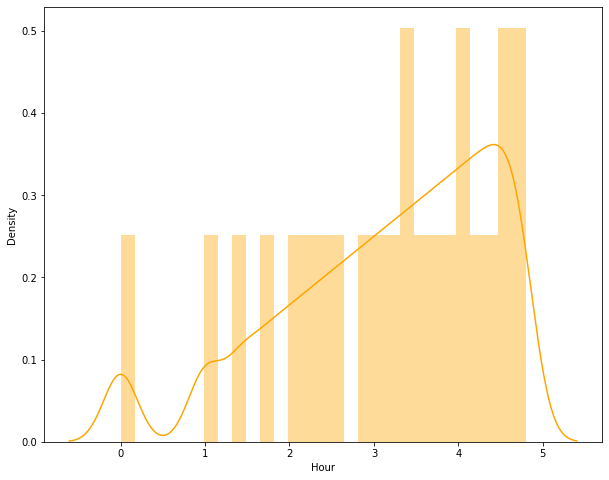

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


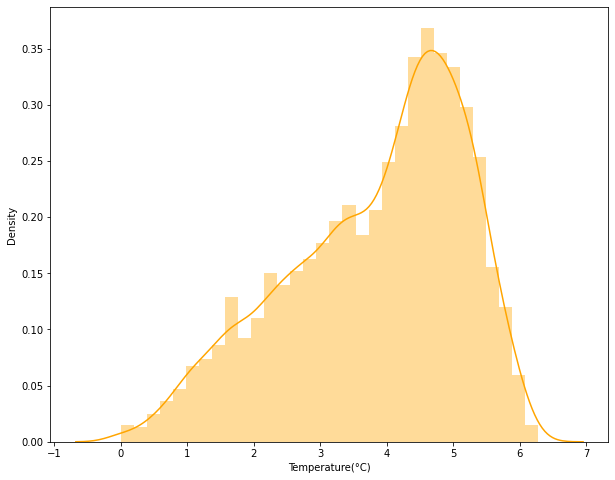

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


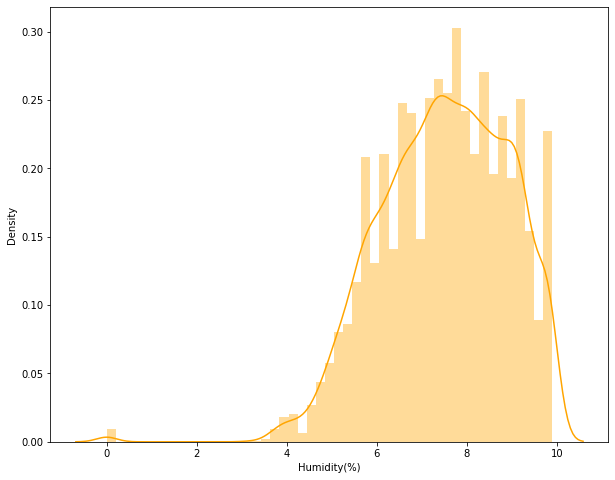

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


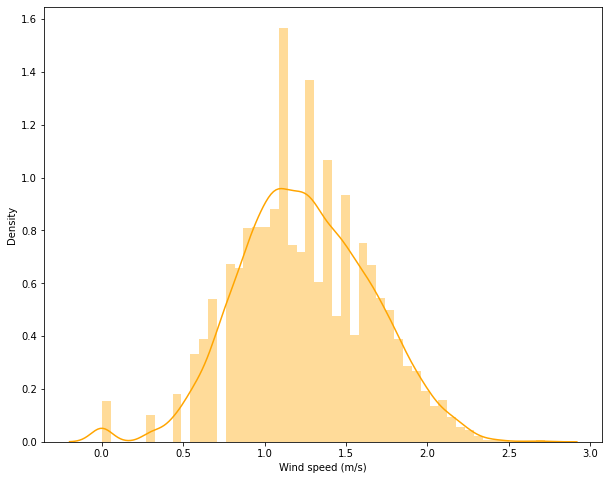

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


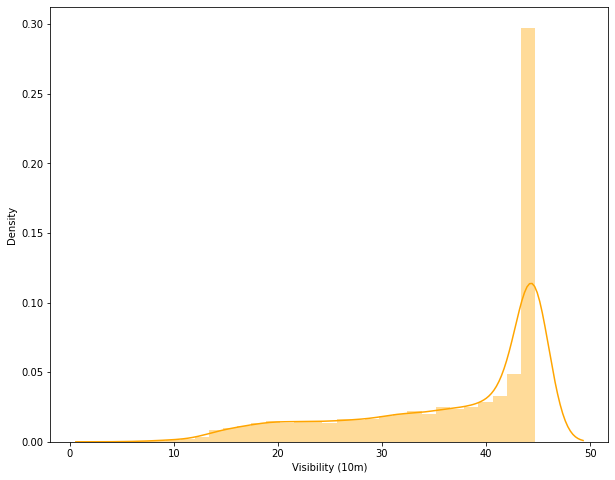

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


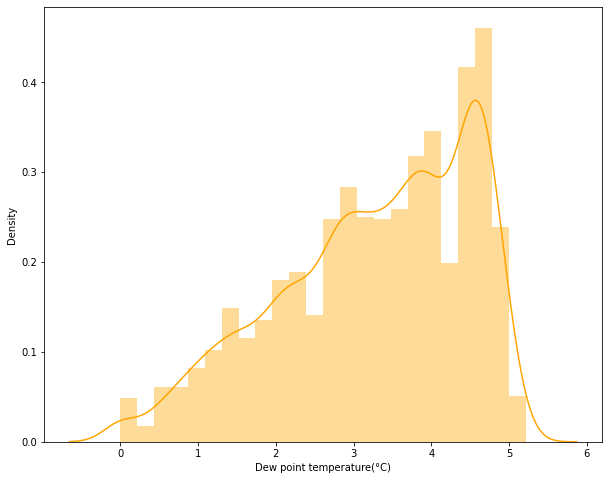

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


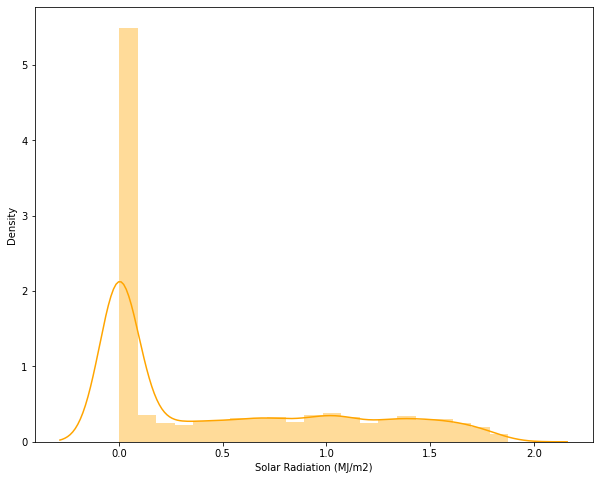

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


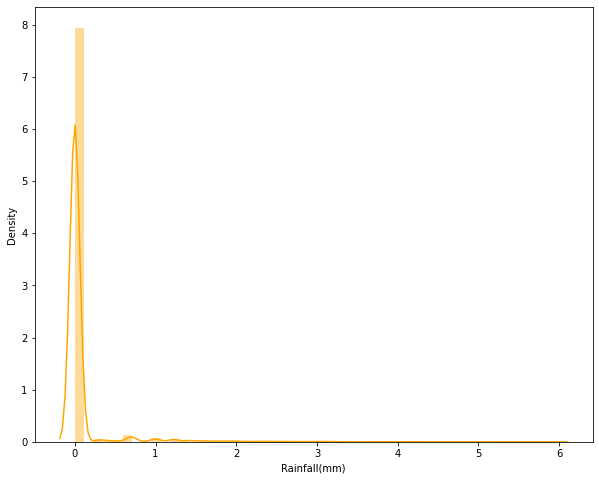

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


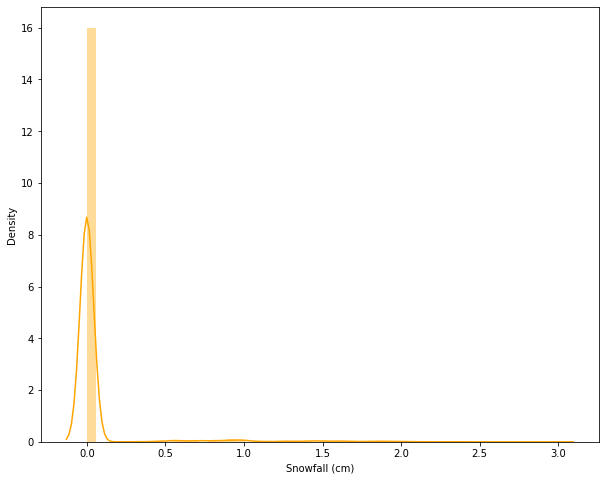

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


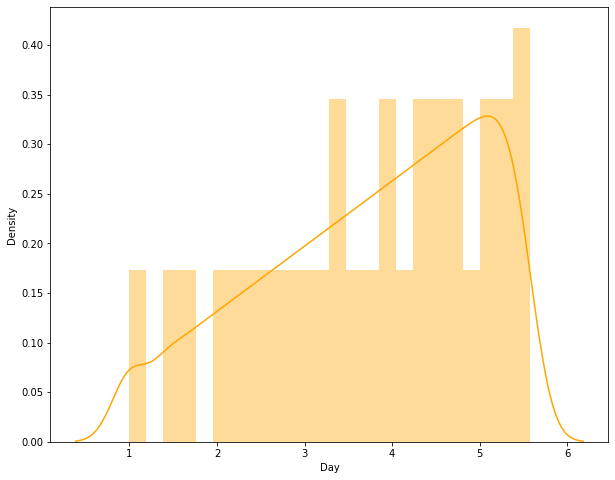

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


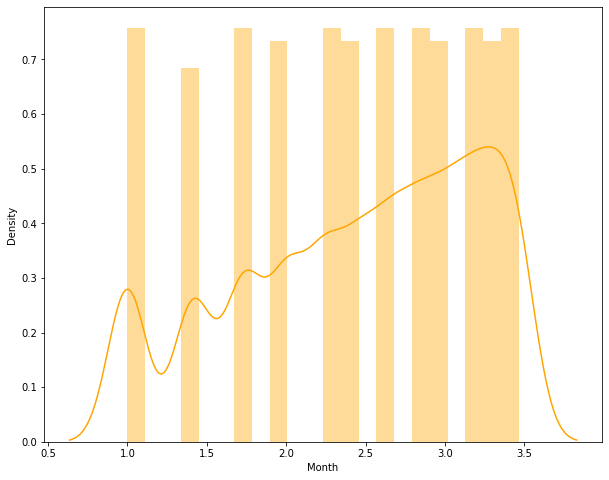

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


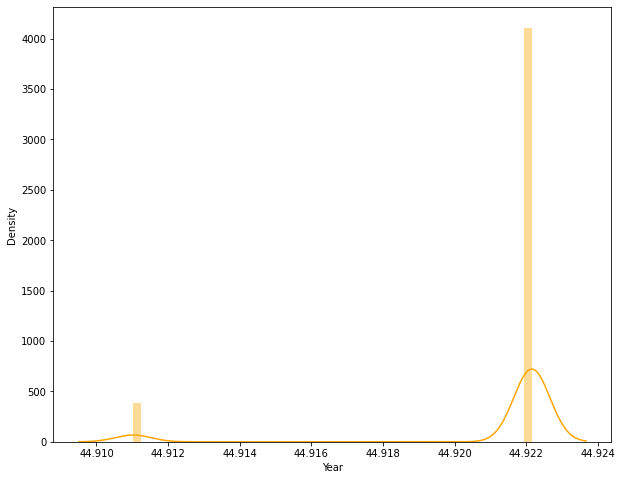

In [ ]:
for col in numeric_features[1:]:
  plt.figure(figsize = (10,8))
  sns.distplot(np.sqrt(df[col]), color = 'orange')
  plt.show()

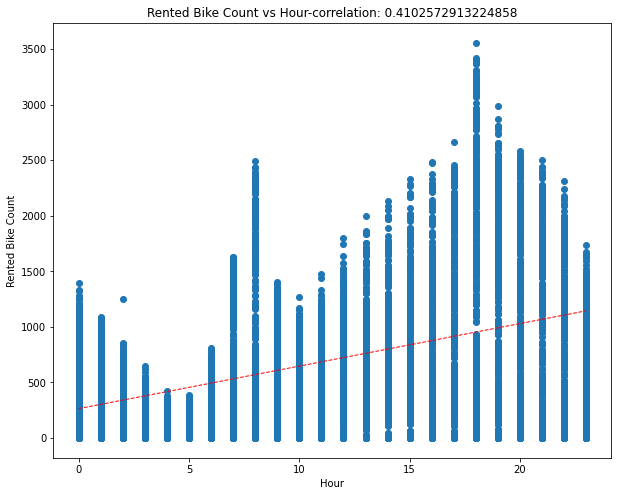

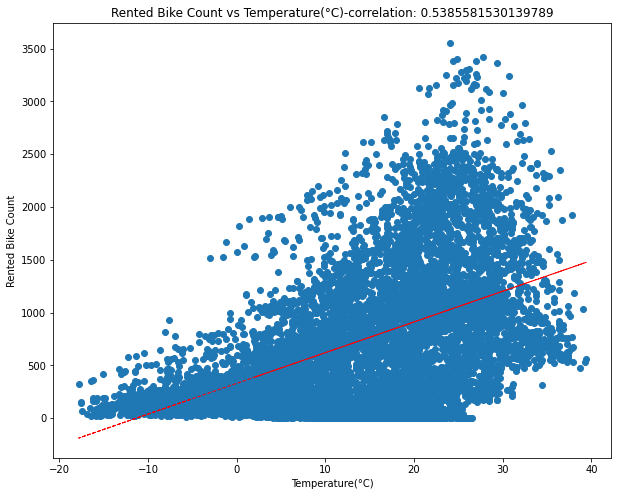

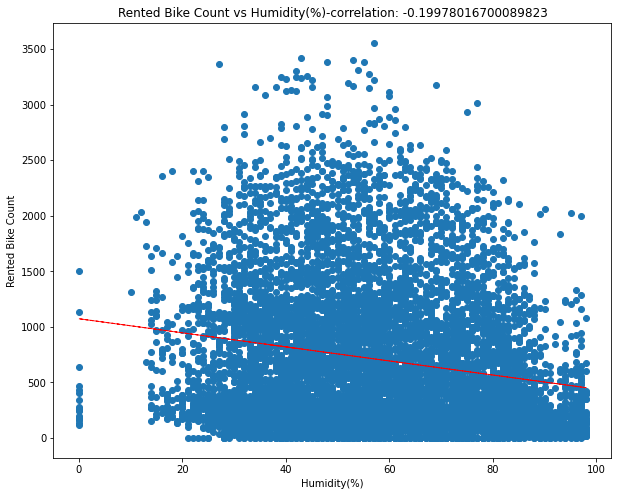

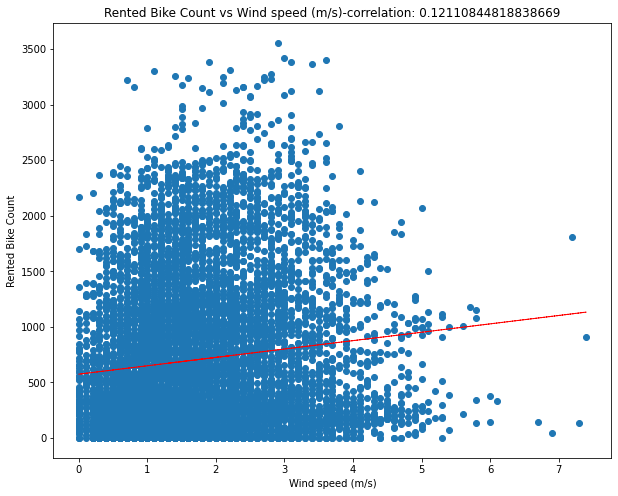

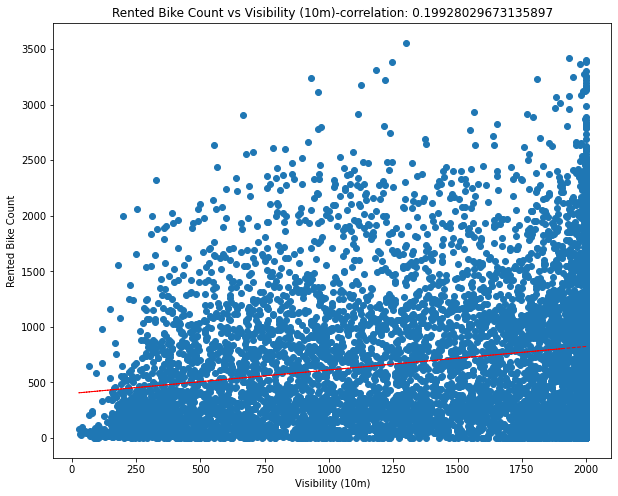

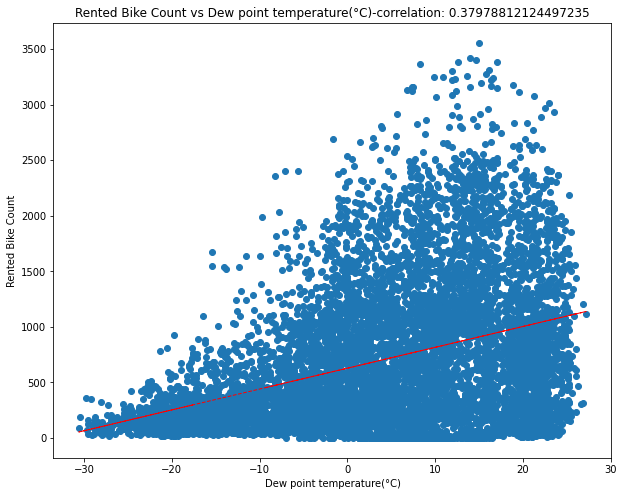

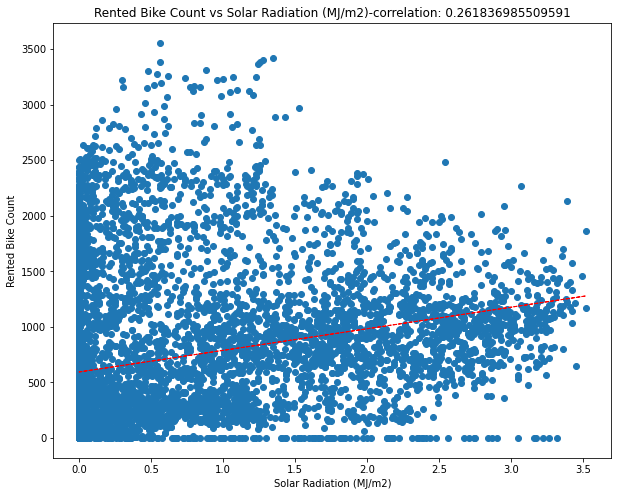

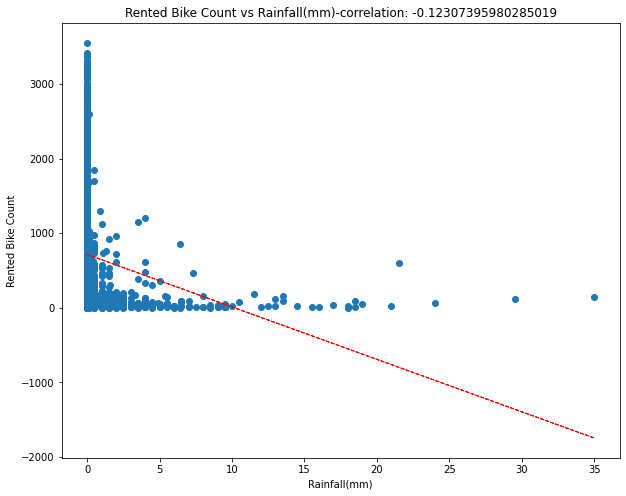

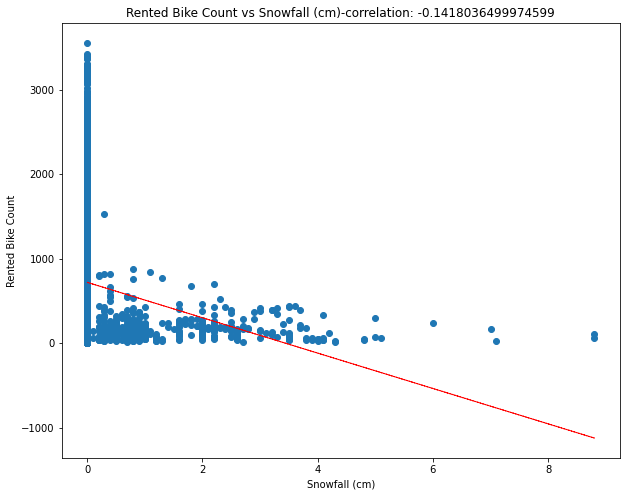

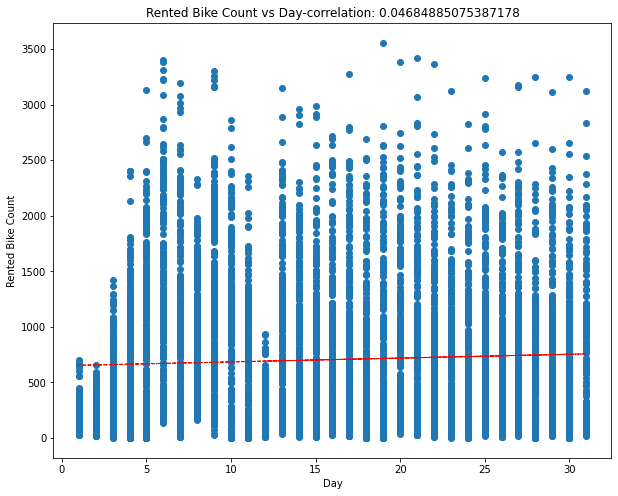

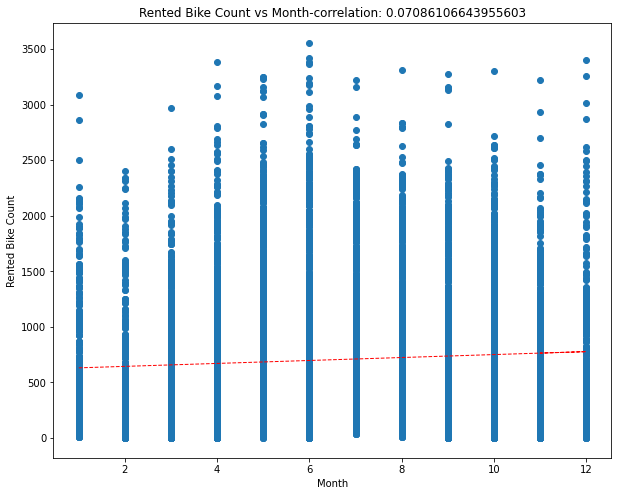

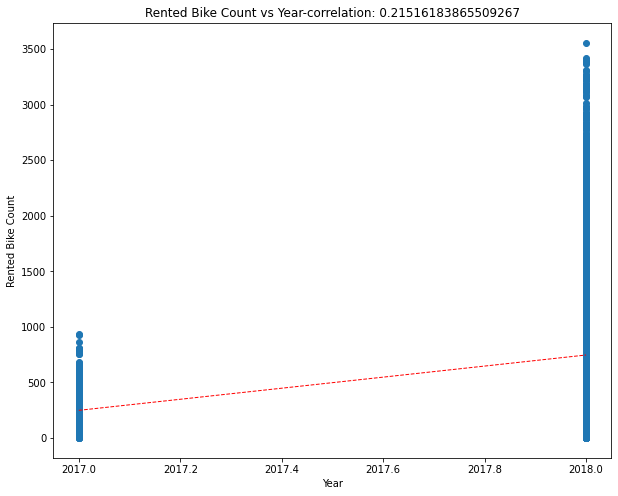

In [ ]:
for col in numeric_features[1:]:
  fig = plt.figure(figsize = (10,8))
  ax = fig.gca()
  feature = df[col]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs ' + col +'-correlation: '+ str(correlation))
  z = np.polyfit(df[col], df['Rented Bike Count'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, 'r--', lw=1)

plt.show()

# Removing Outliers From Dataset



In [ ]:
df = df[df['Wind speed (m/s)']<=4.5]
df = df[df['Solar Radiation (MJ/m2)']<=3]
df = df[df['Rainfall(mm)']<=10]
df = df[df['Snowfall (cm)']<=4]

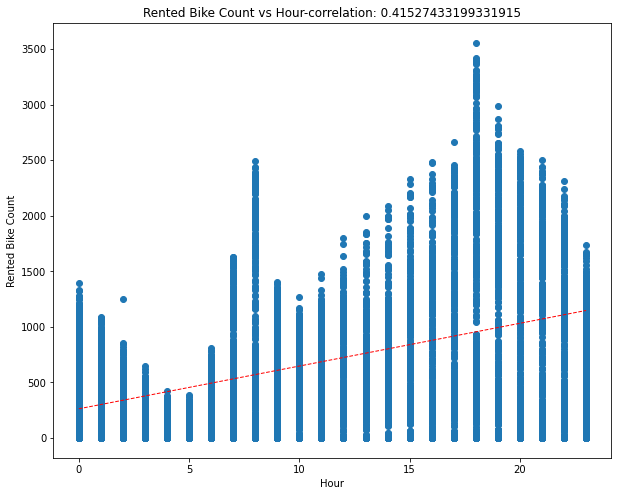

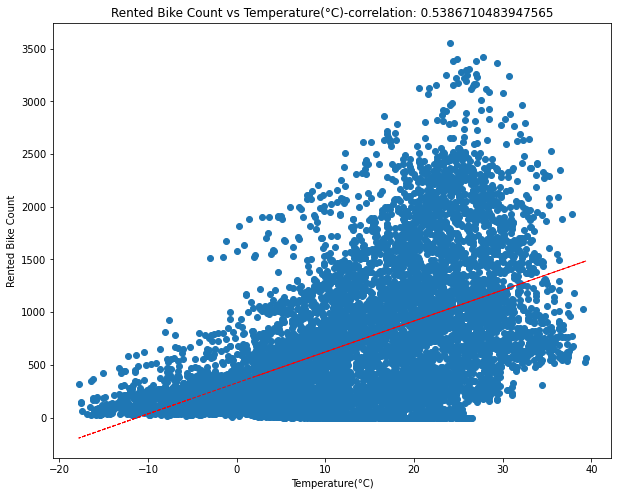

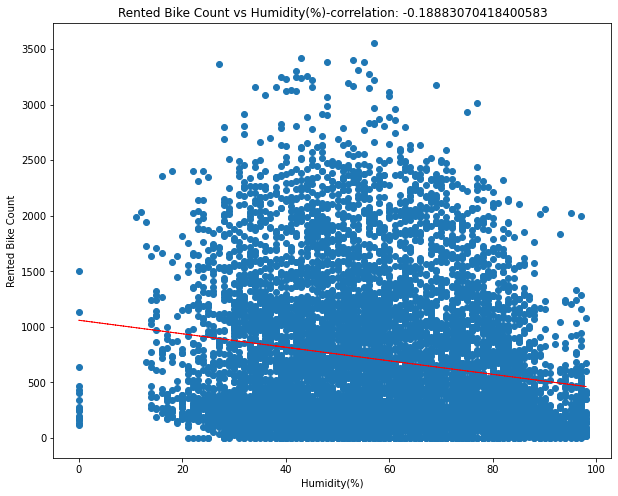

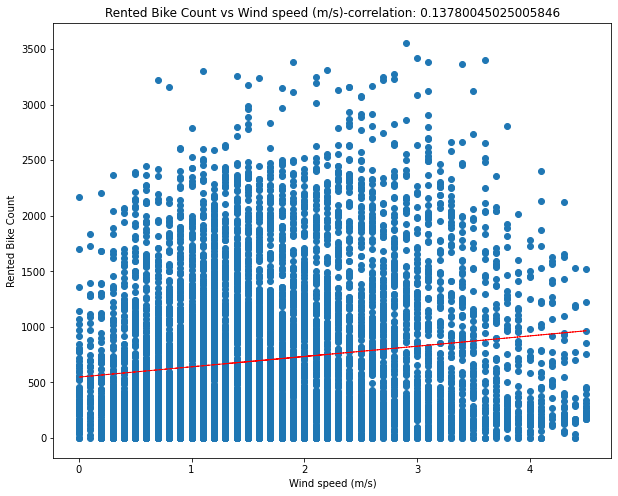

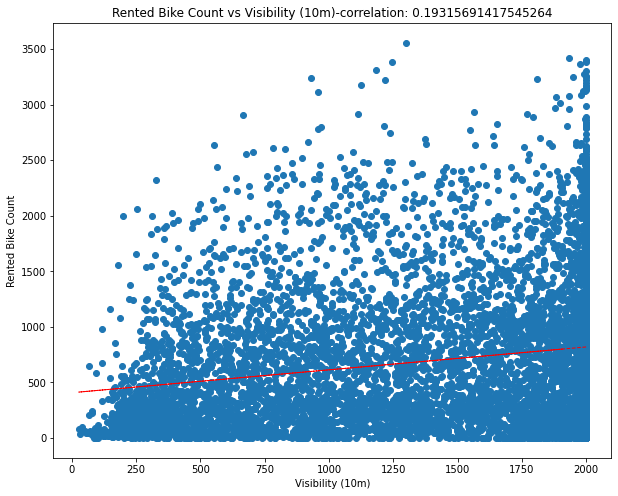

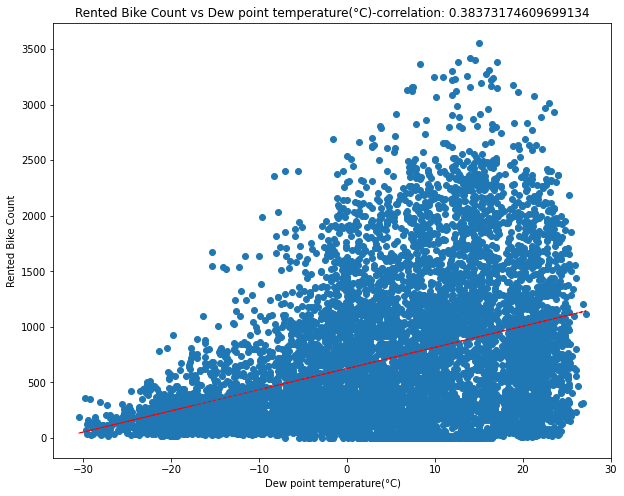

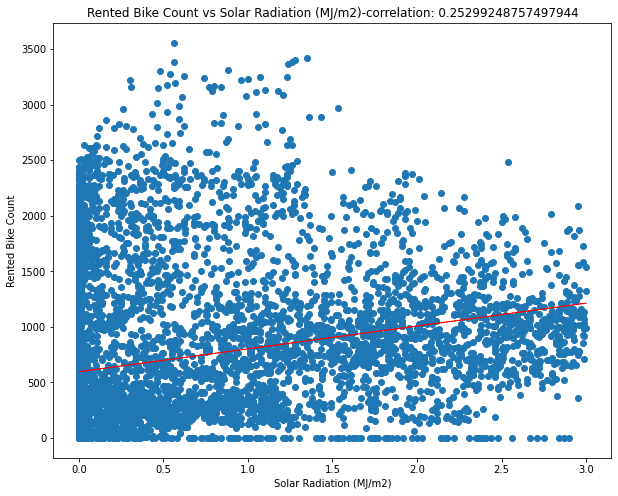

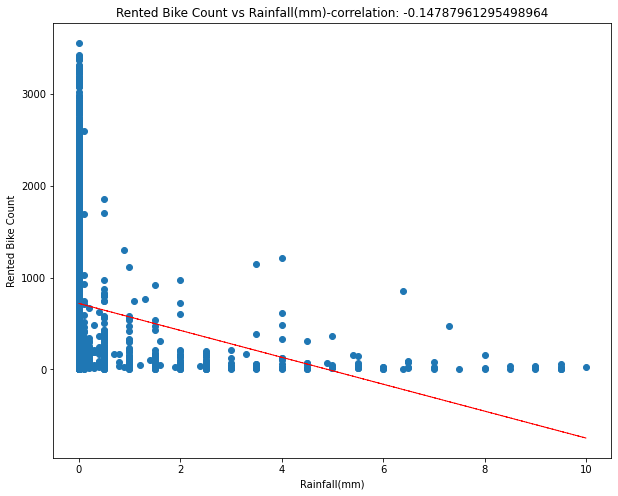

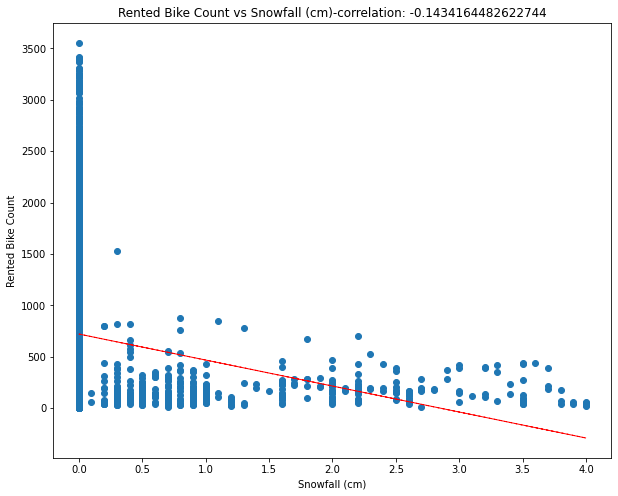

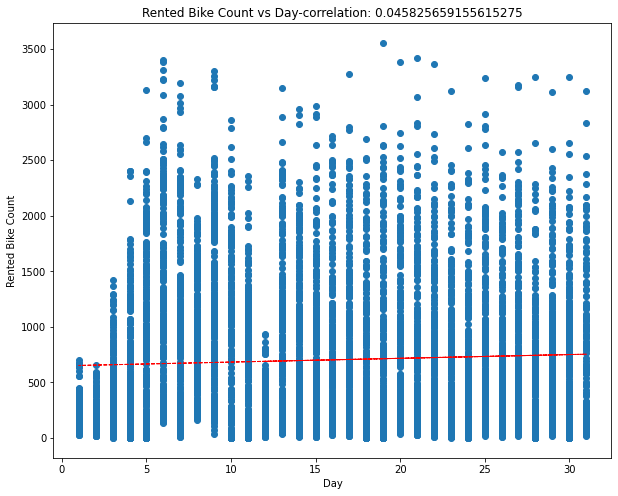

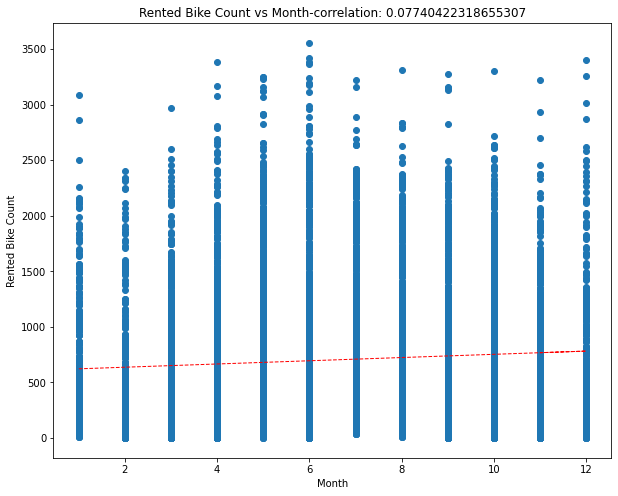

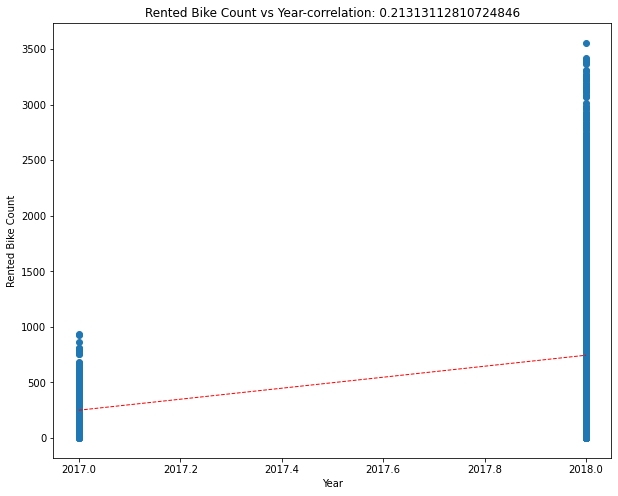

In [ ]:
for col in numeric_features[1:]:
  fig = plt.figure(figsize = (10,8))
  ax = plt.gca()
  feature = df[col]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs '+ col +'-correlation: '+str(correlation))
  z = np.polyfit(df[col], df['Rented Bike Count'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, 'r--', lw=1)

plt.show()

# Correlation

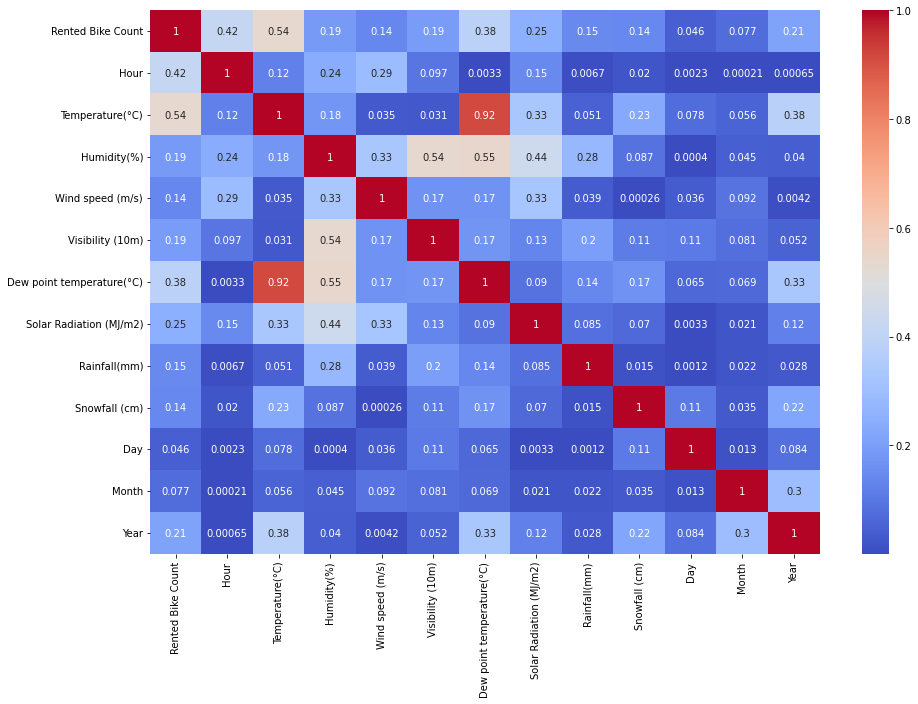

In [ ]:
plt.figure(figsize = (15,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'coolwarm')

From above Heatmap we can see that Temprature and Dew Point Temperature has Higher collinearity. So we can remove Dew Point Temperature column from dataset.

# Removing Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count', 'Day', 'Month', 'Year']]])

,variables,VIF
0,Hour,4.322609
1,Temperature(°C),33.174194
2,Humidity(%),5.533490
3,Wind speed (m/s),5.054000
4,Visibility (10m),9.052174
5,Dew point temperature(°C),17.353662
6,Solar Radiation (MJ/m2),2.704729
7,Rainfall(mm),1.119201
8,Snowfall (cm),1.127175


In [ ]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count', 'Day', 'Month', 'Year', 'Dew point temperature(°C)']]])

,variables,VIF
0,Hour,3.850206
1,Temperature(°C),3.153362
2,Humidity(%),5.031031
3,Wind speed (m/s),4.826641
4,Visibility (10m),4.734917
5,Solar Radiation (MJ/m2),2.144313
6,Rainfall(mm),1.116482
7,Snowfall (cm),1.127023


In [ ]:
df.drop(['Dew point temperature(°C)'],axis=1, inplace=True)

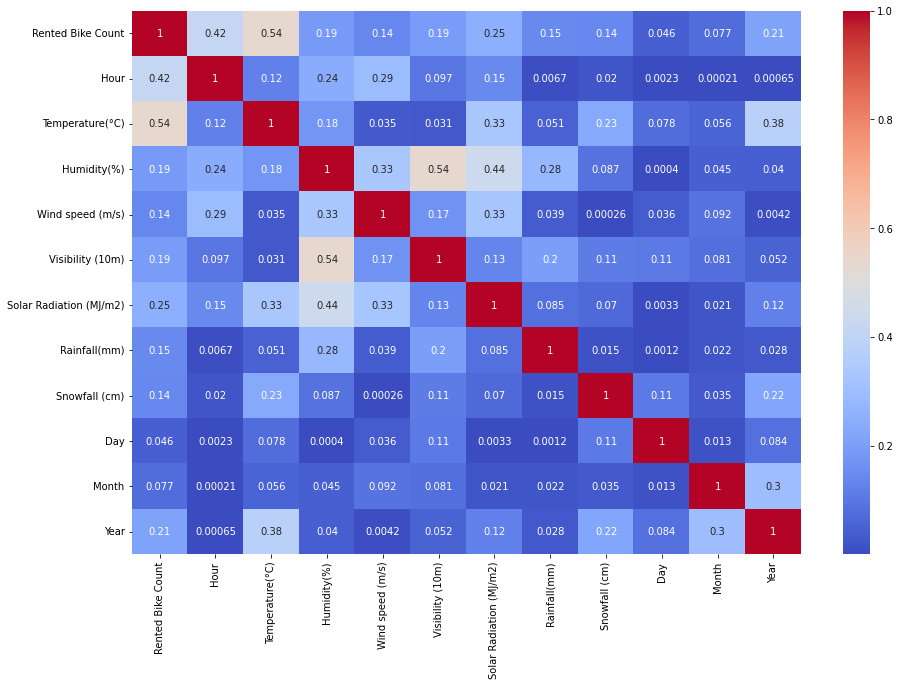

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df.corr()), annot=True, cmap='coolwarm')

# Converting Categorical Variables to Numerical variables

In [ ]:
categorical_feature = df.describe(include =['object','category']).columns
categorical_feature

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
df['Functioning Day'] = df['Functioning Day'].apply(lambda x : 1 if x == 'Yes' else 0)
df['Holiday'] = df['Holiday'].map({'Holiday':1,'No Holiday':0})

In [ ]:
seasons = pd.get_dummies(df['Seasons'] ,drop_first=True)

In [ ]:
df = pd.concat([df,seasons], axis='columns')
df.shape

(8459, 18)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,0,1,12,1,2017,0,0,1


In [ ]:
data = df.copy()

In [ ]:
data['Is_Visibility'] = data['Visibility (10m)'].apply(lambda x:1 if x >= 2000 else 0)
data['Is_Rainfall'] = data['Rainfall(mm)'].apply(lambda x:1 if x >= 0.148687 else 0)
data['Is_Snowfall'] = data['Snowfall (cm)'].apply(lambda x:1 if x >= 0.075068 else 0)
data['Is_Solar_Radiation'] = data['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x >= 0.56911 else 0)
data.drop(['Visibility (10m)', 'Rainfall(mm)', 'Snowfall (cm)', 'Solar Radiation (MJ/m2)'], axis=1, inplace=True)

In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Seasons,Holiday,Functioning Day,Day,Month,Year,Spring,Summer,Winter,Is_Visibility,Is_Rainfall,Is_Snowfall,Is_Solar_Radiation
0,254,0,-5.2,37,2.2,Winter,0,1,12,1,2017,0,0,1,1,0,0,0
1,204,1,-5.5,38,0.8,Winter,0,1,12,1,2017,0,0,1,1,0,0,0
2,173,2,-6.0,39,1.0,Winter,0,1,12,1,2017,0,0,1,1,0,0,0
3,107,3,-6.2,40,0.9,Winter,0,1,12,1,2017,0,0,1,1,0,0,0
4,78,4,-6.0,36,2.3,Winter,0,1,12,1,2017,0,0,1,1,0,0,0


In [ ]:
data.drop(['Seasons','Day','Year'], axis=1, inplace=True)

In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Holiday,Functioning Day,Month,Spring,Summer,Winter,Is_Visibility,Is_Rainfall,Is_Snowfall,Is_Solar_Radiation
0,254,0,-5.2,37,2.2,0,1,1,0,0,1,1,0,0,0
1,204,1,-5.5,38,0.8,0,1,1,0,0,1,1,0,0,0
2,173,2,-6.0,39,1.0,0,1,1,0,0,1,1,0,0,0
3,107,3,-6.2,40,0.9,0,1,1,0,0,1,1,0,0,0
4,78,4,-6.0,36,2.3,0,1,1,0,0,1,1,0,0,0


# Feature Selection

In [ ]:
x = data.iloc[:,1:].values
y = data.iloc[:,0:1].values

In [ ]:
x

array([[ 0. , -5.2, 37. , ...,  0. ,  0. ,  0. ],
       [ 1. , -5.5, 38. , ...,  0. ,  0. ,  0. ],
       [ 2. , -6. , 39. , ...,  0. ,  0. ,  0. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  0. ,  0. ],
       [22. ,  2.1, 41. , ...,  0. ,  0. ,  0. ],
       [23. ,  1.9, 43. , ...,  0. ,  0. ,  0. ]])

In [ ]:
y

array([[254],
       [204],
       [173],
       ...,
       [694],
       [712],
       [584]])

# Implementing Linear Regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6767, 14)
(1692, 14)
(6767, 1)
(1692, 1)


In [ ]:
reg = LinearRegression().fit(x_train,y_train)

In [ ]:
reg.coef_

array([[  28.78817048,   24.5571043 ,   -5.43473354,   27.78316166,
        -116.53691351,  950.34739826,    2.76412507, -129.05009948,
        -128.11751849, -369.68493439,   12.30371479, -514.52319641,
          77.28804571,  -60.27377406]])

In [ ]:
reg.intercept_

array([-404.45966497])

In [ ]:
y_pred_train = reg.predict(x_train)

In [ ]:
y_pred_test = reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
MSE = mean_squared_error(y_test, y_pred_test)
print('MSE :', MSE)

MAE = mean_absolute_error(y_test, y_pred_test)
print('MAE :', MAE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

MSE : 178763.82619840396
MAE : 319.9580609211146
RMSE : 422.8047140210288


In [ ]:
r2_train = r2_score(y_train, y_pred_train)*100
r2_test = r2_score(y_test, y_pred_test)*100
print('r2_train :', r2_train)
print('r2_test :', r2_test)
print('Adjusted r2 :', 1-(1-r2_score(y_test,y_pred_test)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

r2_train : 56.32794029692617
r2_test : 57.35836447242717
Adjusted r2 : 0.5783720591703897


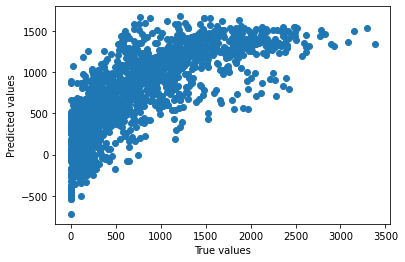

In [ ]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('True values'), plt.ylabel('Predicted values')
plt.show()

In [ ]:
e_linear = y_test - y_pred_test

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

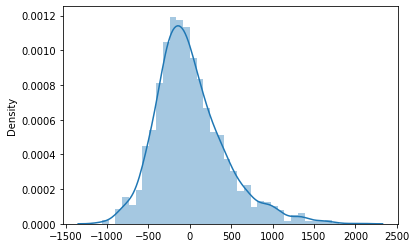

In [ ]:
sns.distplot(e_linear)
plt.show

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha= 0.0001, max_iter= 3000)

In [ ]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(x_train, y_train)

0.5632794029645412

In [ ]:
lasso.coef_

array([  28.78817797,   24.55707395,   -5.43473467,   27.78284486,
       -116.53480063,  950.34300653,    2.76421045, -129.04789066,
       -128.11503796, -369.68254077,   12.30353156, -514.52097646,
         77.28529284,  -60.27289871])

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,5,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.956e+08, tolerance: 2.305e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.976e+08, tolerance: 2.259e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 10, 5, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('\nUsing', lasso_regressor.best_params_, 'The negative mean squared error is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using {'alpha': 0.1} The negative mean squared error is : -184790.81973828998


In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)

In [ ]:
MSE = mean_squared_error(y_test, y_pred_lasso)
print('MSE :', MSE)

MAE = mean_absolute_error(y_test, y_pred_lasso)
print('MAE :', MAE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

MSE : 178780.6381682946
MAE : 319.930973399043
RMSE : 422.8245950371083


In [ ]:
r2_test_lasso = r2_score(y_test, y_pred_lasso)*100
print('r2_test_lasso :', r2_test)
print('Adjusted r2_lasso :', 1-(1-r2_score(y_test,y_pred_lasso)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

r2_test_lasso : 57.35836447242717
Adjusted r2_lasso : 0.5783316217576605


# Implementing Polunomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =2)

In [ ]:
x_poly = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y_train)

LinearRegression()

In [ ]:
y_pred_poly_train = lin_reg.predict(x_poly)
y_pred_poly_test = lin_reg.predict(x_poly_test)

In [ ]:
MSE_poly = mean_squared_error(y_test,y_pred_poly_test)
print('MSE :',MSE_poly)

MAE_poly = mean_absolute_error(y_test,y_pred_poly_test)
print('MAE :',MAE_poly)

RMSE_poly = np.sqrt(MSE_poly)
print('RMSE :',RMSE_poly)

MSE : 119953.36242340773
MAE : 245.27160756997873
RMSE : 346.3428394285173


In [ ]:
r2_poly_train = r2_score(y_train,y_pred_poly_train)*100
r2_poly_train

70.89626478549849

In [ ]:
r2_poly_test = r2_score(y_test,y_pred_poly_test)*100
r2_poly_test

71.38678630044075

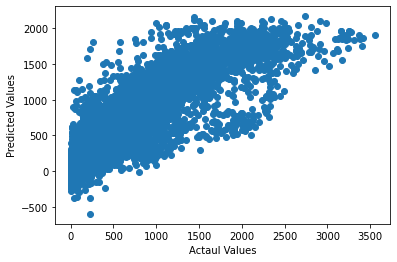

In [ ]:
plt.scatter(y_train,y_pred_poly_train)
plt.xlabel('Actaul Values')
plt.ylabel('Predicted Values')
plt.show()

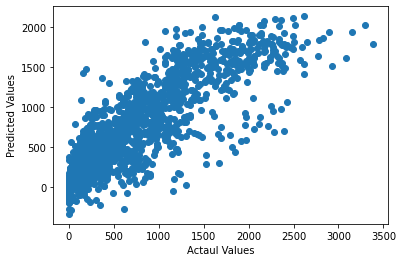

In [ ]:
plt.scatter(y_test,y_pred_poly_test)
plt.xlabel('Actaul Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
e_poly = y_test-y_pred_poly_test

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


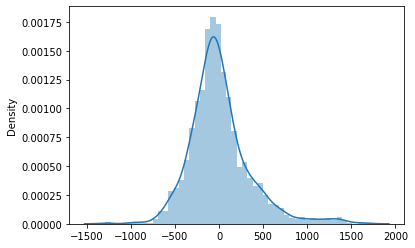

In [ ]:
sns.distplot(e_poly)
plt.show()

# Implementing Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfc = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(random_state=0)

In [ ]:
y_reg_pred = rfc.predict(x_train)
y_reg_pred_test = rfc.predict(x_test)

In [ ]:
MSE_rfc = mean_squared_error(y_test,y_reg_pred_test)
print('MSE :', MSE_rfc)

MAE_rfc = mean_absolute_error(y_test,y_reg_pred_test)
print('MAE :', MAE_rfc)

RMSE_rfc = np.sqrt(MSE_rfc)
print('RMSE :',RMSE_rfc)

MSE : 58333.91172818041
MAE : 146.69697842789597
RMSE : 241.52414315794687


In [ ]:
r2_rfc_train = r2_score(y_train,y_reg_pred)*100
r2_rfc_train

98.16992377791844

In [ ]:
r2_rfc_test = r2_score(y_test,y_reg_pred_test)*100
r2_rfc_test

86.08525306428643

In [ ]:
print('Adjusted R2 :', 1-(1-r2_score(y_test,y_reg_pred_test))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Adjusted R2 : 0.8596908940471577


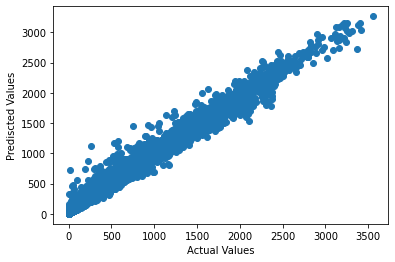

In [ ]:
plt.scatter(y_train,y_reg_pred)
plt.xlabel('Actual Values')
plt.ylabel('Prediscted Values')
plt.show()

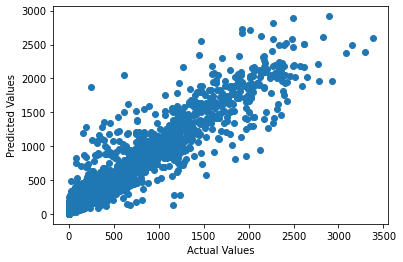

In [ ]:
plt.scatter(y_test,y_reg_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
e = y_test-y_reg_pred_test

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


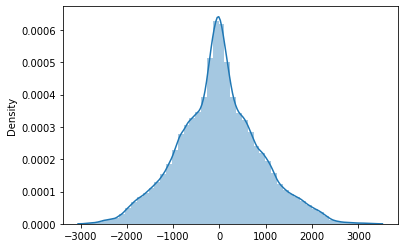

In [ ]:
sns.distplot(e)
plt.show()

# Hyperparameter Tuning using Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'criterion' : ['squared_error','absolute_error','poisson'],'max_features':['auto','sqrt','log2']}

In [ ]:
grid = GridSearchCV(rfc,parameters,cv=5,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='neg_mean_squared_error')

In [ ]:
grid.best_params_

{'criterion': 'absolute_error', 'max_features': 'auto'}

In [ ]:
rfc_2 = RandomForestRegressor(n_estimators =100, random_state = 0, criterion = 'absolute_error', max_features= 'auto', max_depth = 14)
rfc_2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(criterion='absolute_error', max_depth=14, random_state=0)

In [ ]:
y_rfc = rfc_2.predict(x_train)
y_rfc_test = rfc_2.predict(x_test)

In [ ]:
MSE_rfc_grid = mean_squared_error(y_test,y_rfc_test)
print('MSE :',MSE_rfc_grid)

MAE_rfc_grid = mean_absolute_error(y_test,y_rfc_test)
print('MAE :',MAE_rfc_grid)

RMSE_rfc_grid = np.sqrt(MSE_rfc_grid)
print('RMSE :',RMSE_rfc_grid)

MSE : 57626.08239324764
MAE : 145.18205969267137
RMSE : 240.05433216929796


In [ ]:
r2_rfc_grid_train = r2_score(y_train,y_rfc)*100
r2_rfc_grid_train

94.95849602128223

In [ ]:
r2_rfc_grid_test = r2_score(y_test,y_rfc_test)*100
r2_rfc_grid_test

86.25409595133914

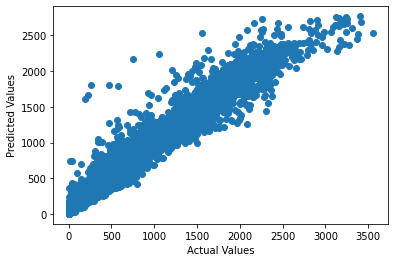

In [ ]:
plt.scatter(y_train,y_rfc)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

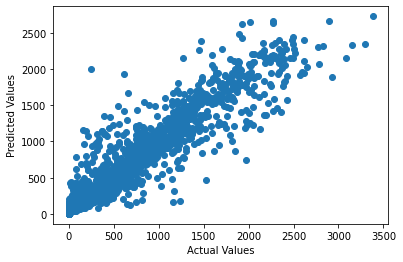

In [ ]:
plt.scatter(y_test,y_rfc_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
e = y_test-y_rfc_test

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


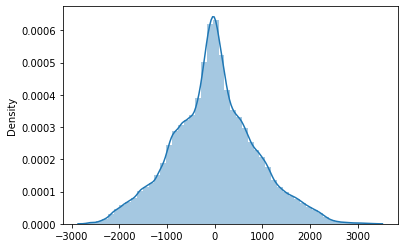

In [ ]:
sns.distplot(e)
plt.show()

# Comparing Evaluation Matrix of all Model used

# Comparison of MSE for all models

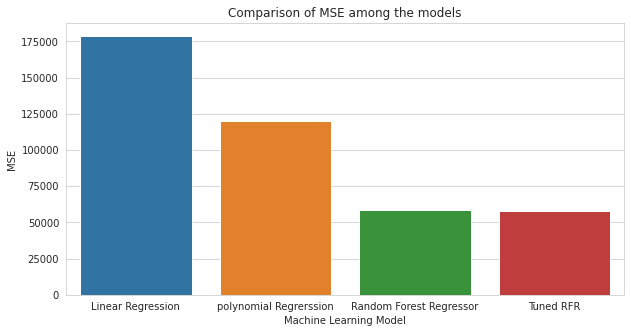

In [ ]:
models = ['Linear Regression','polynomial Regrerssion','Random Forest Regressor','Tuned RFR']
acc = [MSE,MSE_poly,MSE_rfc,MSE_rfc_grid]

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.xlabel('Machine Learning Model')
plt.ylabel('MSE')
sns.barplot(x=models, y=acc)
plt.title('Comparison of MSE among the models')
plt.show()

# Comparing MAE of all the models being used

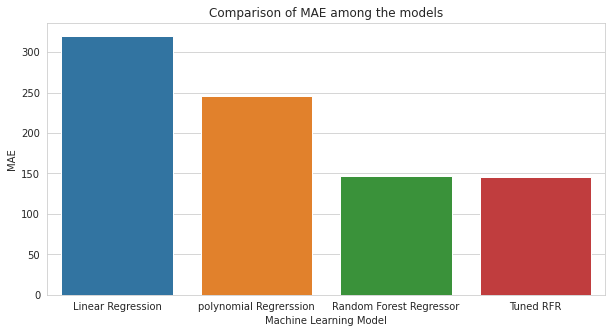

In [ ]:
models = ['Linear Regression','polynomial Regrerssion','Random Forest Regressor','Tuned RFR']
acc = [MAE,MAE_poly,MAE_rfc,MAE_rfc_grid]

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.xlabel('Machine Learning Model')
plt.ylabel('MAE')
sns.barplot(x=models, y=acc)
plt.title('Comparison of MAE among the models')
plt.show()

# Comparing RMSE of all the models being used

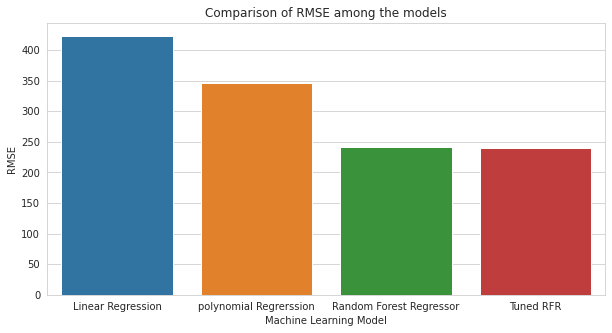

In [ ]:
models = ['Linear Regression','polynomial Regrerssion','Random Forest Regressor','Tuned RFR']
acc = [RMSE,RMSE_poly,RMSE_rfc,RMSE_rfc_grid]

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.xlabel('Machine Learning Model')
plt.ylabel('RMSE')
sns.barplot(x=models, y=acc)
plt.title('Comparison of RMSE among the models')
plt.show()

# Comparing R sqaure of all the models being used for training dataset.

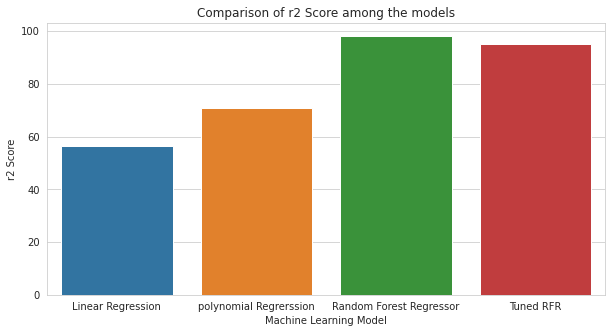

In [ ]:
models = ['Linear Regression','polynomial Regrerssion','Random Forest Regressor','Tuned RFR']
acc = [r2_train,r2_poly_train,r2_rfc_train,r2_rfc_grid_train]

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.xlabel('Machine Learning Model')
plt.ylabel('r2 Score')
sns.barplot(x=models, y=acc)
plt.title('Comparison of r2 Score among the models')
plt.show()

# Comparing R sqaure of all the models being used for testing dataset.

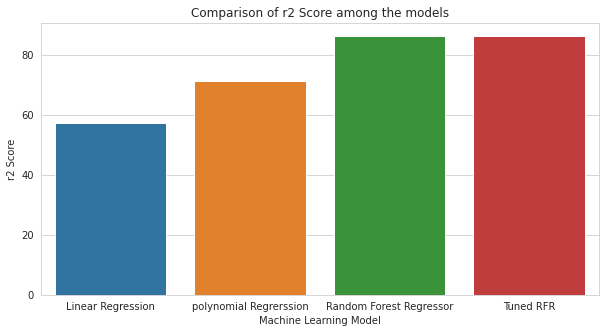

In [ ]:
models = ['Linear Regression','polynomial Regrerssion','Random Forest Regressor','Tuned RFR']
acc = [r2_test,r2_poly_test,r2_rfc_test,r2_rfc_grid_test]

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.xlabel('Machine Learning Model')
plt.ylabel('r2 Score')
sns.barplot(x=models, y=acc)
plt.title('Comparison of r2 Score among the models')
plt.show()

# **Conclusion**



1.  Rented Bike count is dependent on what hour the Bike is Rented
2.  Rented Bike count is dependent on what Temperature the Bike is Rented
3.  Rented Bike count is denpendent on Humidity present in Atmosphere
4.  Rented Bike count is also dependent on is it a functioning day or not
5.  Also it is dependent on is it raining outside or not.



# **From above analysis, Random Forest regressor is the Best regressor for Prediction of Rented Bike Count.**

